In [1]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd

In [ ]:
#@title Importing metric-learn library
!pip install metric-learn
from metric_learn import LMNN, LFDA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [25]:
#@title Functions
def kNN_Labels(k, X_train, Label_train, X_test, Label_test):
  Pred_Labels = []
  for i in range(len(Label_test)):
    Pred_Labels.append(kNN(k, X_train, Label_train, X_test[i]))
  return np.array(Pred_Labels)

def kNN_metrics(True_Labels, Pred_Labels):
  acc = sum(True_Labels == Pred_Labels) / len(True_Labels) * 100
  confusion = np.matrix([[sum(np.array((True_Labels == 0) & (Pred_Labels == 0))), sum(np.array((True_Labels == 1) & (Pred_Labels == 0))), sum(np.array((True_Labels == 2) & (Pred_Labels == 0)))],
               [sum(np.array((True_Labels == 0) & (Pred_Labels == 1))), sum(np.array((True_Labels == 1) & (Pred_Labels == 1))), sum(np.array((True_Labels == 2) & (Pred_Labels == 1)))],
               [sum(np.array((True_Labels == 0) & (Pred_Labels == 2))), sum(np.array((True_Labels == 1) & (Pred_Labels == 2))), sum(np.array((True_Labels == 2) & (Pred_Labels == 2)))]])
  return acc, confusion

def kNN(k, X_train, Label_train, Test):
  L = len(Label_train)
  d = np.sqrt(sum(((X_train - (np.ones([L,1]) @ [Test]))**2).T))
  ind = np.argsort(d)
  n = np.array((np.array(Label_train)[ind[:k]]))
  Label = np.argmax([sum(n == 0), sum(n == 1), sum(n == 2)])
  return Label

def Prob_kNN(k, X_train, Label_train, X_test, Label_test):
  L = len(Label_train)
  Labels_Pred = []; Pr_True = []; Pr_False = []
  for i in range(len(Label_test)):
    d = np.sqrt(sum(((X_train - (np.ones([L,1]) @ [X_test[i]]))**2).T))
    ind = np.argsort(d)
    n = np.array((np.array(Label_train)[ind[:k]]))
    Labels_Pred.append(np.argmax([sum(n == 0), sum(n == 1), sum(n == 2)]))
    if Labels_Pred[i] == Label_test[i]:
      Pr_True.append(sum(n == Label_test[i]) / k)
    else:
      Pr_False.append(sum(n != Label_test[i]) / k)
  plot_Prob_kNN(k, np.array(Pr_True), np.array(Pr_False))

def plot_Prob_kNN(k, Pr_True, Pr_False):
  True_num = []; False_num = []; Labels = [] 
  for i in range(k):
    if (i+1)/k > 1/3:
      True_num.append(sum(np.array(Pr_True == (i+1)/k)))
      False_num.append(sum(np.array(Pr_False == (i+1)/k)))
      Labels.append(round((i+1)/k,3))
  barWidth = 1 / (len(Labels)+1)
  plt.figure(figsize=(8, 8), dpi=80)
  for i in range(len(Labels)):
    plt.bar(barWidth*i, False_num[i], color = sns.color_palette("deep", len(Labels))[i], width = barWidth, label = Labels[i])
    plt.bar(barWidth*i + 1, True_num[i], color = sns.color_palette("deep", len(Labels))[i], width = barWidth)
  plt.title('The Probabilty of chossing an answer for k = {}'.format(k), fontweight ='bold', fontsize = 15)
  plt.xlabel('Cond', fontweight ='bold', fontsize = 12)
  plt.ylabel('Count', fontweight ='bold', fontsize = 12)
  plt.xticks([barWidth*len(Labels)/2, barWidth*len(Labels)/2 + 1], ['False', 'True'])
  plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

def plot_tsne(X, y, Title):
    colormap = plt.cm.Paired
    plt.figure(figsize=(8, 6))
    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y, cmap = colormap)
    plt.xlabel('First dimension')
    plt.ylabel('Secomd dimension')
    plt.title(Title)
    plt.show()

def LMNN_k(K, X, Label, Title, n):
  lmnn = LMNN(k = K, learn_rate = 1e-6, n_components = n)
  lmnn.fit(X, Label)
  X_LMNN = lmnn.transform(X)
  if n == 2:
    plot_tsne(X_LMNN, Label, Title)
  return X_LMNN, lmnn

def LFDA_k(K, X, Label, Title, n):
  lfda = LFDA(k = K, n_components = n)
  lfda.fit(X, Label)
  X_LFDA = lfda.transform(X)
  if n == 2:
    plot_tsne(X_LFDA, Label, Title)
  return X_LFDA, lfda

In [40]:
#@title Adding Dataset
data = load_wine()
c = list(zip(data.data,data.target))
np.random.shuffle(c)
X, Label = zip(*c)
X_train = X[:142]
Label_train = np.array(Label[:142])
X_test = X[142:]
Label_test = np.array(Label[142:])

> kNN Classifier


In [41]:
#@title  Part a. Designing kNN Classifier
Pred_Labels1 = kNN_Labels(1, X_train, Label_train, X_test, Label_test) 
acc1, confusion1 = kNN_metrics(Label_test, Pred_Labels1)
print('(k = 1)\n accuracy =' , acc1,'%\n cofusion matrix:\n' ,confusion1, '\n')
Pred_Labels5 = kNN_Labels(5, X_train, Label_train, X_test, Label_test) 
acc5, confusion5 = kNN_metrics(Label_test, Pred_Labels5)
print('(k = 5)\n accuracy =' , acc5,'%\n cofusion matrix:\n' ,confusion5, '\n')
Pred_Labels10 = kNN_Labels(10, X_train, Label_train, X_test, Label_test) 
acc10, confusion10 = kNN_metrics(Label_test, Pred_Labels10)
print('(k = 10)\n accuracy =' , acc10,'%\n cofusion matrix:\n' ,confusion10, '\n')
Pred_Labels20 = kNN_Labels(20, X_train, Label_train, X_test, Label_test) 
acc20, confusion20 = kNN_metrics(Label_test, Pred_Labels20)
print('(k = 20)\n accuracy =' , acc20,'%\n cofusion matrix:\n' ,confusion20, '\n')

(k = 1)
 accuracy = 83.33333333333334 %
 cofusion matrix:
 [[11  0  0]
 [ 1  9  2]
 [ 1  2 10]] 

(k = 5)
 accuracy = 75.0 %
 cofusion matrix:
 [[11  0  0]
 [ 1 11  7]
 [ 1  0  5]] 

(k = 10)
 accuracy = 77.77777777777779 %
 cofusion matrix:
 [[12  0  0]
 [ 1 10  6]
 [ 0  1  6]] 

(k = 20)
 accuracy = 63.888888888888886 %
 cofusion matrix:
 [[12  0  1]
 [ 1 10 10]
 [ 0  1  1]] 



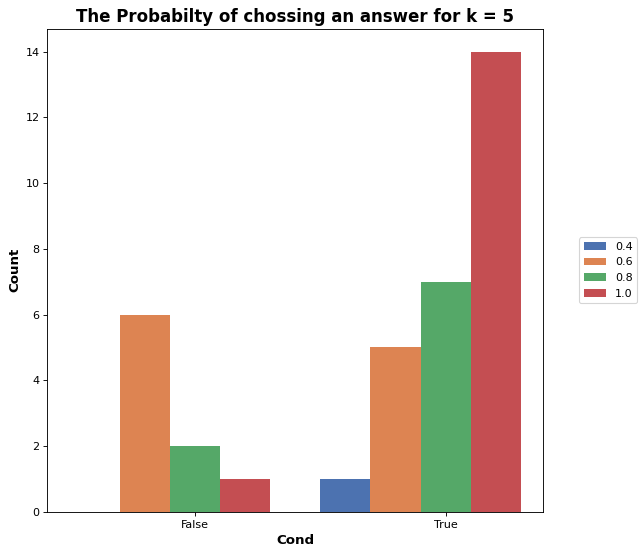

In [42]:
#@title Part b. The Probabilty of chossing an answer (k = 5)
Prob_kNN(5, X_train, Label_train, X_test, Label_test)

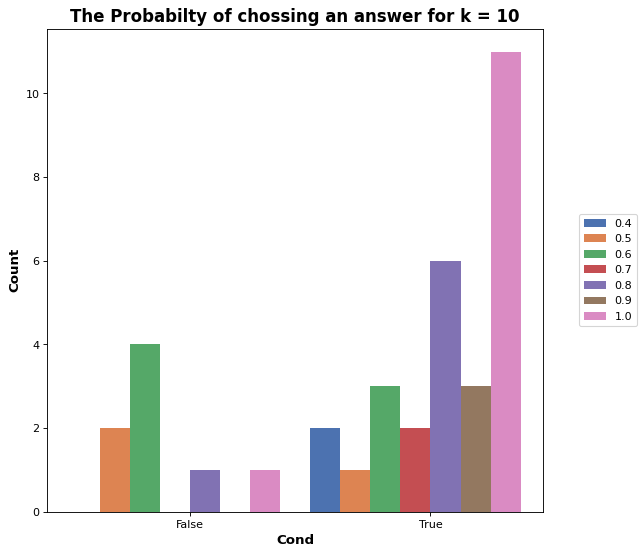

In [43]:
#@title Part b. The Probabilty of chossing an answer (k = 10)
Prob_kNN(10, X_train, Label_train, X_test, Label_test)

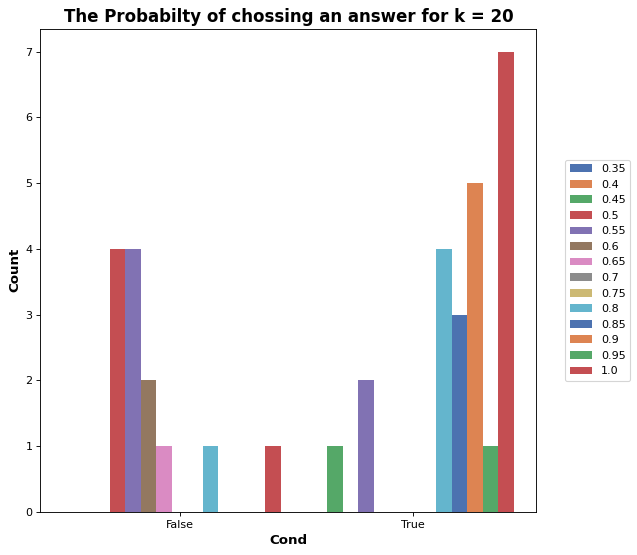

In [44]:
#@title Part b. The Probabilty of chossing an answer (k = 20)
Prob_kNN(20, X_train, Label_train, X_test, Label_test)

> Metric Learning

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


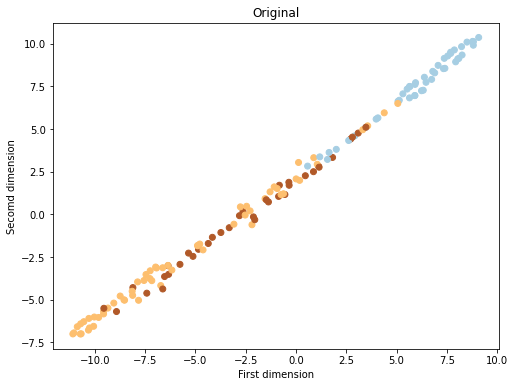

In [54]:
#@title Plotting Transformed Data in New Domain (Original)
pca = PCA(n_components = 2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
plot_tsne(X_pca, Label_train, 'Original')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


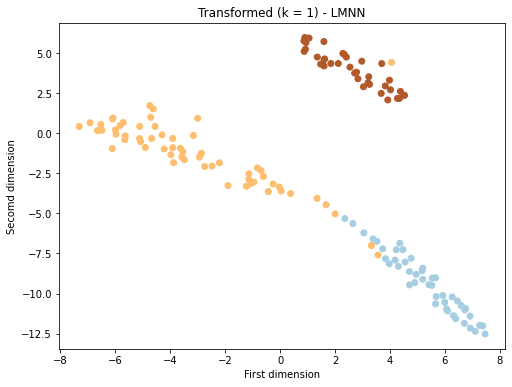

In [53]:
#@title Plotting Transformed Data in New Domain (k = 1) - LMNN
X_LMNN_1, lmnn_1 = LMNN_k(1, X_train, Label_train, 'Transformed (k = 1) - LMNN', 2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


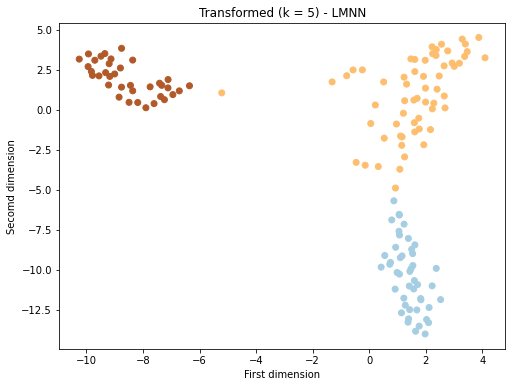

In [52]:
#@title Plotting Transformed Data in New Domain (k = 5) - LMNN
X_LMNN_5, lmnn_5 = LMNN_k(5, X_train, Label_train, 'Transformed (k = 5) - LMNN', 2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


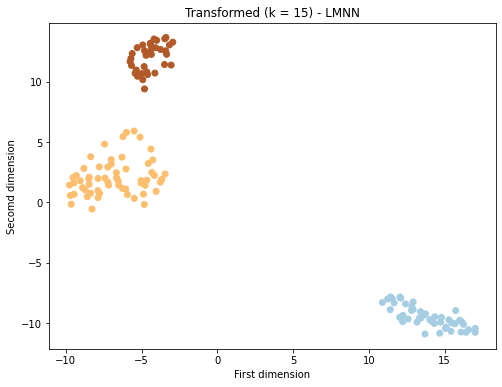

In [51]:
#@title Plotting Transformed Data in New Domain (k = 15) - LMNN
X_LMNN_15, lmnn_15 = LMNN_k(15, X_train, Label_train, 'Transformed (k = 15) - LMNN', 2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


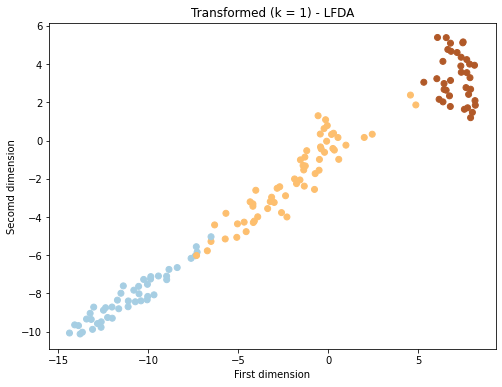

In [50]:
#@title Plotting Transformed Data in New Domain (k = 1) - LFDA
X_LFDA_1, lfda_1 = LFDA_k(1, X_train, Label_train, 'Transformed (k = 1) - LFDA', 2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


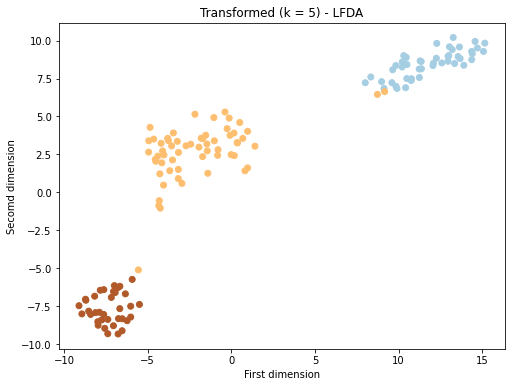

In [49]:
#@title Plotting Transformed Data in New Domain (k = 5) - LFDA
X_LFDA_5, lfda_5 = LFDA_k(5, X_train, Label_train, 'Transformed (k = 5) - LFDA', 2)

/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


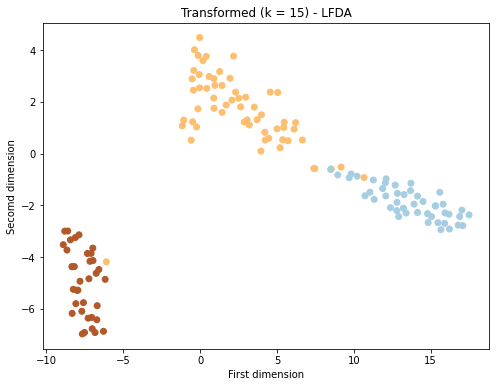

In [48]:
#@title Plotting Transformed Data in New Domain (k = 15) - LFDA
X_LFDA_15, lfda_15 = LFDA_k(15, X_train, Label_train, 'Transformed (k = 15) - LFDA', 2)

In [46]:
#@title Comparing LMNN classifiers functionality
X_LMNN, lmnn = LMNN_k(15, X_train, Label_train, 'Transformed (k = 15) - LMNN', 13)
X_test_LMNN = lmnn.transform(X_test)

Pred_Labels_LMNN_1 = kNN_Labels(1, X_LMNN, Label_train, X_test_LMNN, Label_test) 
acc_LMNN_1, confusion_LMNN_1 = kNN_metrics(Label_test, Pred_Labels_LMNN_1)
print('LMNN: (k = 1)\n accuracy =' , acc_LMNN_1,'%\n confusion matrix:\n' ,confusion_LMNN_1, '\n')

Pred_Labels_LMNN_5 = kNN_Labels(5, X_LMNN, Label_train, X_test_LMNN, Label_test) 
acc_LMNN_5, confusion_LMNN_5 = kNN_metrics(Label_test, Pred_Labels_LMNN_5)
print('LMNN: (k = 5)\n accuracy =' , acc_LMNN_5,'%\n confusion matrix:\n' ,confusion_LMNN_5, '\n')

Pred_Labels_LMNN_10 = kNN_Labels(10, X_LMNN, Label_train, X_test_LMNN, Label_test) 
acc_LMNN_10, confusion_LMNN_10 = kNN_metrics(Label_test, Pred_Labels_LMNN_10)
print('LMNN: (k = 10)\n accuracy =' , acc_LMNN_10,'%\n confusion matrix:\n' ,confusion_LMNN_10, '\n')

Pred_Labels_LMNN_20 = kNN_Labels(20, X_LMNN, Label_train, X_test_LMNN, Label_test) 
acc_LMNN_20, confusion_LMNN_20 = kNN_metrics(Label_test, Pred_Labels_LMNN_20)
print('LMNN: (k = 20)\n accuracy =' , acc_LMNN_20,'%\n confusion matrix:\n' ,confusion_LMNN_20, '\n')

LMNN: (k = 1)
 accuracy = 100.0 %
 confusion matrix:
 [[13  0  0]
 [ 0 11  0]
 [ 0  0 12]] 

LMNN: (k = 5)
 accuracy = 100.0 %
 confusion matrix:
 [[13  0  0]
 [ 0 11  0]
 [ 0  0 12]] 

LMNN: (k = 10)
 accuracy = 97.22222222222221 %
 confusion matrix:
 [[13  0  0]
 [ 0 11  1]
 [ 0  0 11]] 

LMNN: (k = 20)
 accuracy = 97.22222222222221 %
 confusion matrix:
 [[13  0  0]
 [ 0 11  1]
 [ 0  0 11]] 



In [47]:
#@title Comparing LFDA classifiers functionality
X_LFDA, lfda = LFDA_k(15, X_train, Label_train, 'Transformed (k = 15) - LFDA', 13)
X_test_LFDA = lfda.transform(X_test)

Pred_Labels_LFDA_1 = kNN_Labels(1, X_LFDA, Label_train, X_test_LFDA, Label_test) 
acc_LFDA_1, confusion_LFDA_1 = kNN_metrics(Label_test, Pred_Labels_LFDA_1)
print('LFDA: (k = 1)\n accuracy =' , acc_LFDA_1,'%\n cofusion matrix:\n' ,confusion_LFDA_1, '\n')

Pred_Labels_LFDA_5 = kNN_Labels(5, X_LFDA, Label_train, X_test_LFDA, Label_test) 
acc_LFDA_5, confusion_LFDA_5 = kNN_metrics(Label_test, Pred_Labels_LFDA_5)
print('LFDA: (k = 5)\n accuracy =' , acc_LFDA_5,'%\n cofusion matrix:\n' ,confusion_LFDA_5, '\n')

Pred_Labels_LFDA_10 = kNN_Labels(10, X_LFDA, Label_train, X_test_LFDA, Label_test) 
acc_LFDA_10, confusion_LFDA_10 = kNN_metrics(Label_test, Pred_Labels_LFDA_10)
print('LFDA: (k = 10)\n accuracy =' , acc_LFDA_10,'%\n cofusion matrix:\n' ,confusion_LFDA_10, '\n')

Pred_Labels_LFDA_20 = kNN_Labels(20, X_LFDA, Label_train, X_test_LFDA, Label_test) 
acc_LFDA_20, confusion_LFDA_20 = kNN_metrics(Label_test, Pred_Labels_LFDA_20)
print('LFDA: (k = 20)\n accuracy =' , acc_LFDA_20,'%\n cofusion matrix:\n' ,confusion_LFDA_20, '\n')

LFDA: (k = 1)
 accuracy = 100.0 %
 cofusion matrix:
 [[13  0  0]
 [ 0 11  0]
 [ 0  0 12]] 

LFDA: (k = 5)
 accuracy = 97.22222222222221 %
 cofusion matrix:
 [[12  0  0]
 [ 1 11  0]
 [ 0  0 12]] 

LFDA: (k = 10)
 accuracy = 97.22222222222221 %
 cofusion matrix:
 [[12  0  0]
 [ 1 11  0]
 [ 0  0 12]] 

LFDA: (k = 20)
 accuracy = 97.22222222222221 %
 cofusion matrix:
 [[12  0  0]
 [ 1 11  0]
 [ 0  0 12]] 



/usr/local/lib/python3.8/dist-packages/metric_learn/lfda.py:109: UserWarning: Chosen k (15) too large, using 12 instead.
  warnings.warn('Chosen k (%d) too large, using %d instead.'
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


Text(0.5, 1.0, 'Repreasentation of Correlation Matrix - Raw Data')

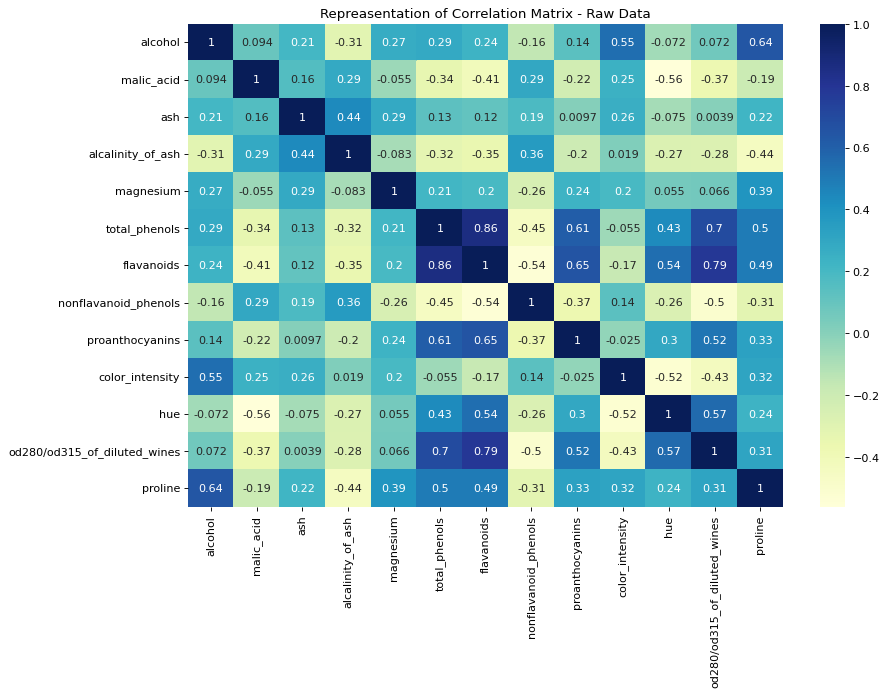

In [55]:
#@title Repreasentation of Correlation Matrix - Raw Data
DF = pd.DataFrame(data  = X, columns = data.feature_names)
corr = DF.corr()
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.title('Repreasentation of Correlation Matrix - Raw Data')

Text(0.5, 1.0, 'Repreasentation of Correlation Matrix - Transformed Data with LMNN')

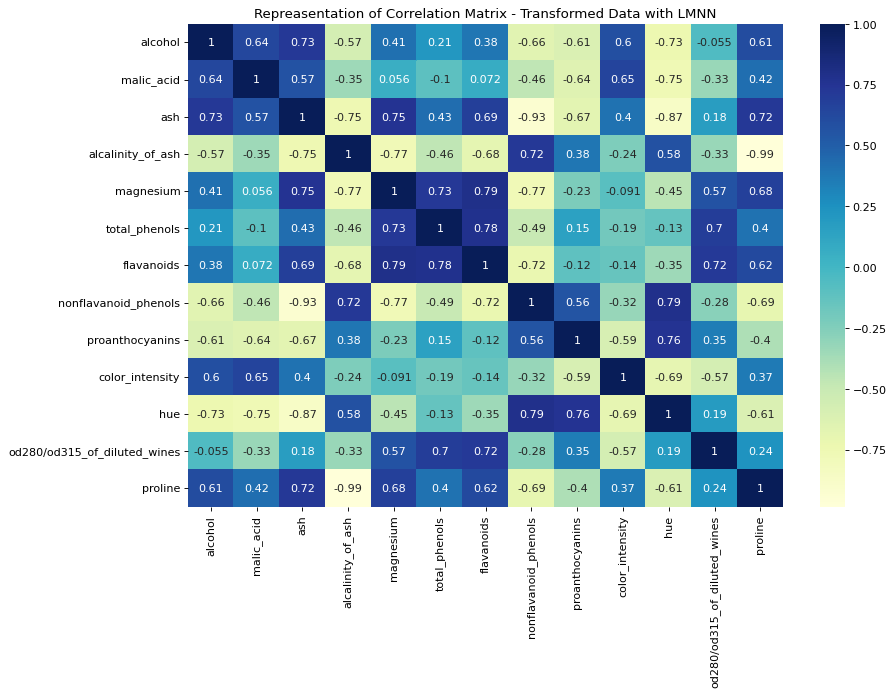

In [56]:
#@title Repreasentation of Correlation Matrix - Transformed Data with LMNN
DF = pd.DataFrame(data  = X_LMNN, columns = data.feature_names)
corr = DF.corr()
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.title('Repreasentation of Correlation Matrix - Transformed Data with LMNN')

Text(0.5, 1.0, 'Repreasentation of Correlation Matrix - Transformed Data with LFDA')

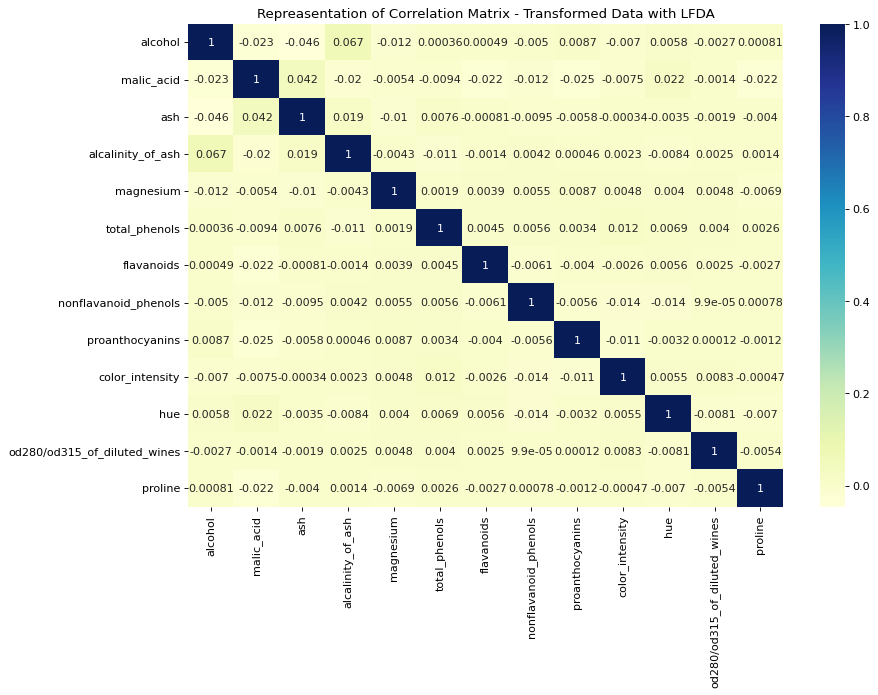

In [57]:
#@title Repreasentation of Correlation Matrix - Transformed Data with LFDA
DF = pd.DataFrame(data  = X_LFDA, columns = data.feature_names)
corr = DF.corr()
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.title('Repreasentation of Correlation Matrix - Transformed Data with LFDA')